# Clustering And PCA Assignment 

1. Data Understanding and Cleaning
2. Data Preparation
3. Modelling
4. Clustering

In [2]:
#import all the necessary libraries

import pandas as pd
import numpy as np
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

## Data Understanding

In [3]:
#let's read the dataset
data = pd.read_csv('Country-data.csv')
data.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [4]:
#Converting exports,imports and health spending percentages to absolute values.
data['exports'] = data['exports']*data['gdpp']/100
data['imports'] = data['imports']*data['gdpp']/100
data['health'] = data['health']*data['gdpp']/100

In [5]:
data.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [6]:
data.shape

(167, 10)

In [7]:
#basic data checks
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [8]:
#basic data cleaning checks
data.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

## Data Preparation

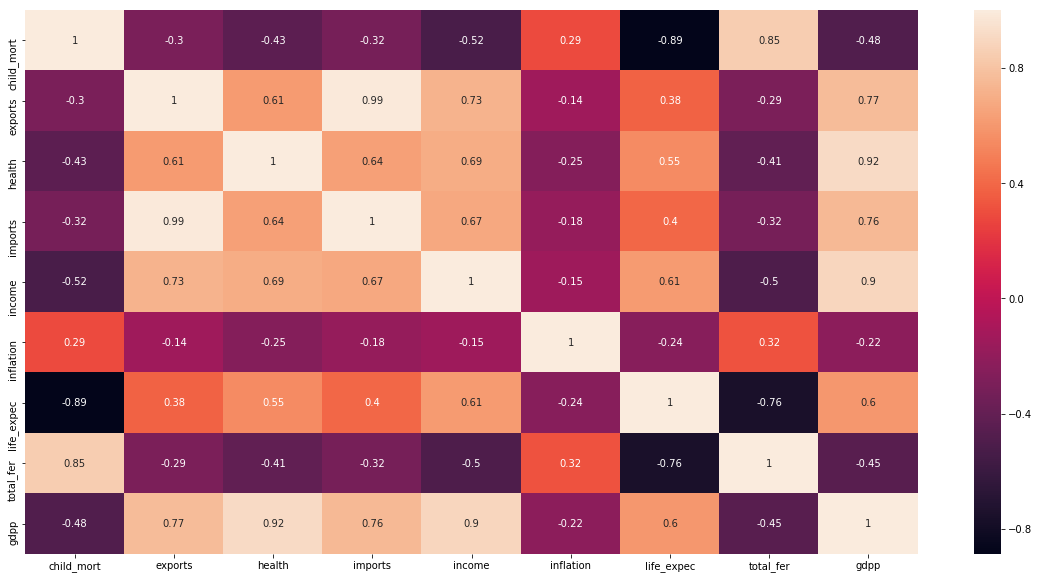

In [9]:
#Let's see if we can apply PCA to do dimensional reduction
#first let's plot the correlation matrix and check if the data is indeed highly correlated
#so that the usage of PCA in this scenario is justified
plt.figure(figsize = (20,10))        
sns.heatmap(data.corr(),annot = True)

- A lot of highly correlated variables exist, hence the usage of PCA is justified. 


In [10]:
#The final matrix would only contain the data columns. Hence let's drop the country column
datam=data.drop(['country'],axis=1)
datam.head()  

child_mort  exports    health   imports  income  inflation  life_expec  \
0        90.2    55.30   41.9174   248.297    1610       9.44        56.2   
1        16.6  1145.20  267.8950  1987.740    9930       4.49        76.3   
2        27.3  1712.64  185.9820  1400.440   12900      16.10        76.5   
3       119.0  2199.19  100.6050  1514.370    5900      22.40        60.1   
4        10.3  5551.00  735.6600  7185.800   19100       1.44        76.8   

   total_fer   gdpp  
0       5.82    553  
1       1.65   4090  
2       2.89   4460  
3       6.16   3530  
4       2.13  12200

In [11]:
#We observe that a lot of the data variables are of different orders of magnitude. 
#Let's do rescaling so that PCA can be applied.
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
data2 = standard_scaler.fit_transform(datam)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [12]:
data2

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

### PCA on the data

- While computng the principal components, since there is no need to divide the original dataset in test and train data, so we apply PCA and calculate PCs on the original daatset itself.

In [13]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [14]:
#apply PCA
pca.fit(data2)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [15]:
#List of PCA components.It would be the same as the number of variables
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [16]:
#Let's check the variance ratios
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

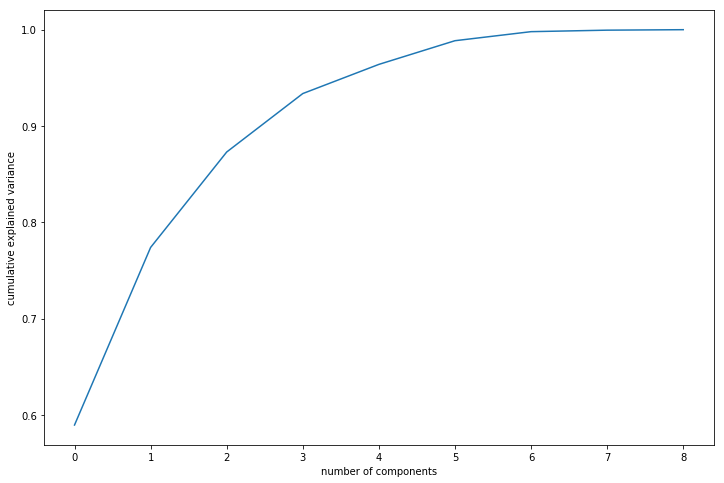

In [17]:
#Plotting the scree plot
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

- Clearly over 90% of the data is properly explained by the first 4 principal components. Let's use them only for our clustering process

In [18]:
#Check the first four components now
colnames = list(data.drop('country',axis=1).columns)
pcs_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2], 'PC4':pca.components_[3]})
pcs_df

Feature       PC1       PC2       PC3       PC4
0  child_mort -0.316392  0.476267 -0.150012 -0.148052
1     exports  0.342887  0.397311 -0.030574  0.449425
2      health  0.358535  0.155053 -0.075703 -0.599712
3     imports  0.344865  0.370781 -0.072174  0.461798
4      income  0.380041  0.128384  0.145764 -0.154806
5   inflation -0.143085  0.221261  0.948419 -0.007628
6  life_expec  0.343857 -0.369820  0.196752 -0.018395
7   total_fer -0.302842  0.459715 -0.077834 -0.213928
8        gdpp  0.399988  0.200624  0.010339 -0.364772

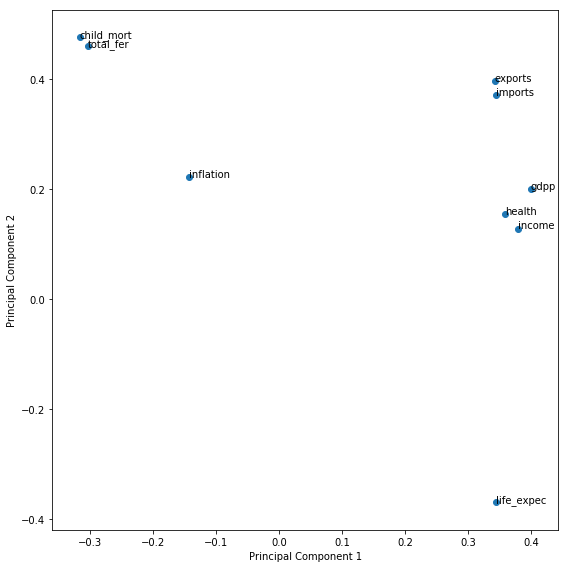

In [19]:
#Let's visualise the first 2 components
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

- A lot of variables have a good loading score on the first principal component. Similarly Child mortality and total fertility is well explained by the 2nd principal component.

In [20]:
#We are observing 90% variance with 3 principal components. So let's take the data until that many components
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=3)

In [21]:
#let's project our original data on the 3 principal components
df_train_pca = pca_final.fit_transform(data2)
df_train_pca.shape

(167, 3)

In [22]:
#take the transpose of the PC matrix so that we can create the new matrix
pc = np.transpose(df_train_pca)
pc

array([[-2.63744157e+00, -2.22769569e-02, -4.57626261e-01,
        -2.72452030e+00,  6.49848516e-01,  3.71968554e-02,
        -3.32691520e-01,  3.18036154e+00,  3.81568156e+00,
        -4.67515152e-01,  1.49875246e+00,  1.47097104e+00,
        -1.01419903e+00,  8.45238116e-01, -1.34473920e-02,
         3.96087770e+00, -4.02707071e-01, -2.36598657e+00,
        -7.14998191e-01, -1.01778054e+00,  2.52812687e-01,
        -1.13095912e+00,  1.66280202e-01,  2.69525065e+00,
         2.80569006e-01, -2.75387449e+00, -2.76406823e+00,
        -1.17929406e+00, -2.44142939e+00,  3.39411994e+00,
        -5.23229456e-01, -3.24153046e+00, -3.18889212e+00,
         6.92394286e-01, -1.28851026e-01, -1.38822916e-02,
        -1.94991207e+00, -3.11679859e+00, -2.04776384e+00,
         4.31523541e-01, -2.57476033e+00,  8.46278142e-01,
         2.31379384e+00,  1.67463303e+00,  4.37600084e+00,
        -3.67788028e-01, -3.02658561e-01, -8.36646810e-01,
        -3.36572123e-01, -1.05577406e+00, -1.94848965e+0

In [23]:
#Let's create the newer matrix according to the given principal components
rownames = list(data['country'])
pcs_df2 = pd.DataFrame({'country':rownames,'PC1':pc[0],'PC2':pc[1],'PC3':pc[2]})
pcs_df2.head()

country       PC1       PC2       PC3
0          Afghanistan -2.637442  1.469038 -0.541359
1              Albania -0.022277 -1.431896 -0.020701
2              Algeria -0.457626 -0.673301  0.961867
3               Angola -2.724520  2.174583  0.606687
4  Antigua and Barbuda  0.649849 -1.024374 -0.250103

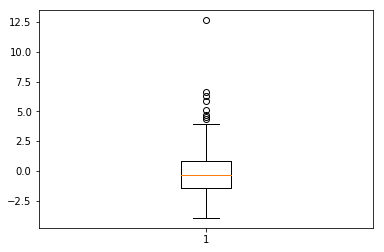

In [24]:
#Let's do the outlier analysis before proceeding to clustering
#We can reassign the outliers to the clusters later
plt.boxplot(pcs_df2.PC1)
Q1 = pcs_df2.PC1.quantile(0.05)
Q3 = pcs_df2.PC1.quantile(0.95)
IQR = Q3 - Q1
pcs_df2 = pcs_df2[(pcs_df2.PC1 >= Q1) & (pcs_df2.PC1 <= Q3)]

In [25]:
plt.boxplot(pcs_df2.PC2)
Q1 = pcs_df2.PC2.quantile(0.05)
Q3 = pcs_df2.PC2.quantile(0.95)
IQR = Q3 - Q1
pcs_df2 = pcs_df2[(pcs_df2.PC2 >= Q1) & (pcs_df2.PC2 <= Q3)]

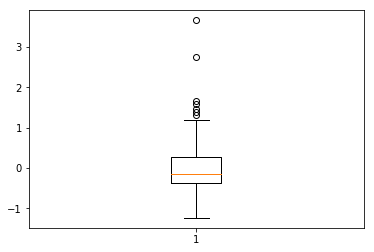

In [26]:
plt.boxplot(pcs_df2.PC3)
Q1 = pcs_df2.PC3.quantile(0.05)
Q3 = pcs_df2.PC3.quantile(0.95)
IQR = Q3 - Q1
dat3 = pcs_df2[(pcs_df2.PC3 >= Q1 ) & (pcs_df2.PC3 <= Q3)]

In [27]:
#Outlier analysis is now done.Let's check the data again.
pcs_df2.shape

(133, 4)

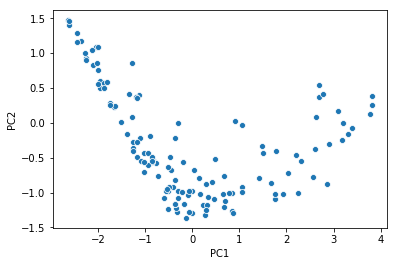

In [28]:
#let's check the spread of the dataset
sns.scatterplot(x='PC1',y='PC2',data=pcs_df2)

## Clustering

#### Hopkins Statistics:
The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [29]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [30]:
#Let's check the Hopkins measure
hopkins(pcs_df2.drop(['country'],axis=1))

0.7870811548795801

In [31]:
#0.81 is a good Hopkins score. Hence the data is suitable for clustering. Preliminary check is now done.
#We can do standardisation again or else we can skip this step as well.
data3 = pcs_df2
data3_1 = standard_scaler.fit_transform(dat3.drop(['country'],axis=1))

### K-means Clustering
#### Silhouette Analysis

$$\text{Silhouette Score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [32]:
#Let's check the silhouette score first to identify the ideal number of clusters
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(data3_1)
    sse_.append([k, silhouette_score(data3_1, kmeans.labels_)])

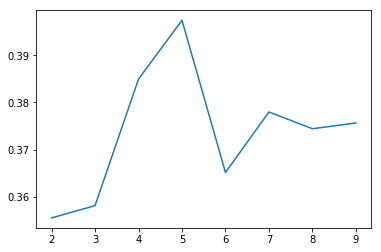

In [33]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

In [34]:
#The silhouette score reaches a peak at around 5 clusters indicating that it might be the ideal number of clusters.
#Use the elbow curve method to identify the ideal number of clusters.
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(data3_1)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [35]:
#A distinct elbow is formed at around 3-7 clusters. Let's finally create the clusters and see for ourselves which ones fare better
#K-means with k=5 clusters
model_cluster5 = KMeans(n_clusters = 5, max_iter=50)
model_cluster5.fit(data3_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [36]:
data4=data3
data4.index = pd.RangeIndex(len(data4.index))
data_km = pd.concat([data4, pd.Series(model_cluster5.labels_)], axis=1)
data_km.columns = ['country', 'PC1', 'PC2','PC3','ClusterID']
data_km.head()

country       PC1       PC2       PC3  ClusterID
0          Afghanistan -2.637442  1.469038 -0.541359        1.0
1              Algeria -0.457626 -0.673301  0.961867        3.0
2  Antigua and Barbuda  0.649849 -1.024374 -0.250103        0.0
3            Argentina  0.037197 -0.680889  1.466963        0.0
4              Armenia -0.332692 -1.274517  0.176636        2.0

In [37]:
data_km['ClusterID'].value_counts()

0.0    52
2.0    24
1.0    19
3.0    17
4.0     7
Name: ClusterID, dtype: int64

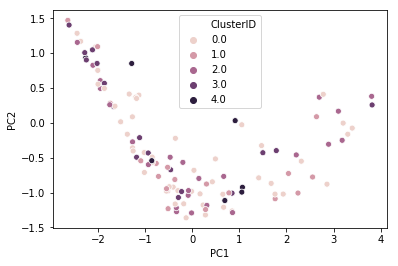

In [38]:
#Each cluster has a good number of countries associated with it(at least 5% of the dataset under consideration)
#Let's do some further visualizations.
#We'll be visualising the clusters on the original principal components
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=data_km)

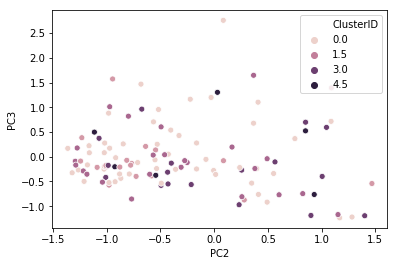

In [39]:
sns.scatterplot(x='PC2',y='PC3',hue='ClusterID',data=data_km)

In [40]:
sns.scatterplot(x='PC3',y='PC1',hue='ClusterID',data=data_km)

In [41]:
#One thing we noticed is some even though some distinct clusters are being formed, some are not so good.
#Now let's create the cluster means wrt to the various variables mentioned in the question and plot and see how they are related
data5=pd.merge(data,data_km,on='country')
data6=data5[['country','child_mort','exports','imports','health','income','inflation','life_expec','total_fer','gdpp','ClusterID']]
clu_chi = 	pd.DataFrame(data6.groupby(["ClusterID"]).child_mort.mean())
clu_exp= 	pd.DataFrame(data6.groupby(["ClusterID"]).exports.mean())
clu_imp = 	pd.DataFrame(data6.groupby(["ClusterID"]).imports.mean())
clu_hea = 	pd.DataFrame(data6.groupby(["ClusterID"]).health.mean())
clu_inc = 	pd.DataFrame(data6.groupby(["ClusterID"]).income.mean())
clu_inf = 	pd.DataFrame(data6.groupby(["ClusterID"]).inflation.mean())         
clu_lif = 	pd.DataFrame(data6.groupby(["ClusterID"]).life_expec.mean())
clu_tot = 	pd.DataFrame(data6.groupby(["ClusterID"]).total_fer.mean())
clu_gdpp = 	pd.DataFrame(data6.groupby(["ClusterID"]).gdpp.mean())

df = pd.concat([pd.Series([0,1,2,3,4]),clu_chi,clu_exp,clu_imp,clu_hea,clu_inc,clu_inf,clu_lif,clu_tot,clu_gdpp], axis=1)
df.columns = ["ClusterID", "Child_Mortality", "Exports", "Imports","Health_Spending","Income","Inflation","Life_Expectancy","Total_Fertility","GDPpcapita"]
df

ClusterID  Child_Mortality      Exports      Imports  Health_Spending  \
0          0        29.842308  4764.754356  4345.783213       812.977437   
1          1        25.305263  5062.811000  5566.707316       873.999626   
2          2        29.479167  5800.455367  5067.696792      1166.688413   
3          3        48.829412  3532.377588  4002.308235       749.752412   
4          4        29.328571  5952.558143  4936.514571       602.891571   

         Income  Inflation  Life_Expectancy  Total_Fertility    GDPpcapita  
0  16303.461538   7.559942        71.376923         2.682115  10843.980769  
1  14135.263158   6.262632        73.205263         2.622632  10027.368421  
2  19001.250000   5.552958        71.900000         2.580000  14380.250000  
3  10053.529412   6.464176        68.605882         3.360588   8853.117647  
4  18697.142857   7.997143        71.185714         2.974286  10361.000000

**Child mortality, Income, Inflation and GDP per capita are good predictors for the development of a country. On cross-checking with the original Principal components that we drew, these 4 components had good scores. Hence we can say that they are a good source of information for the Clustering Process.Let's visualise the clusters along these.**

In [42]:
#Along child-mortality and income
sns.scatterplot(x='child_mort',y='income',hue='ClusterID',data=data6)

In [43]:
# Checking for cluster values of child_mort, health, total_fer
plt.figure(figsize=(20, 25))

#plotting the clusters values for child_mort
plt.subplot(3,3,1)
sns.barplot(x=data6.ClusterID,y=data6.child_mort)

#plotting the clusters values for health
plt.subplot(3,3,2)
sns.barplot(x=data6.ClusterID,y=data6.health)

#plotting the clusters values for total_fer
plt.subplot(3,3,3)
sns.barplot(x=data6.ClusterID,y=data6.total_fer)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [44]:
#let's take a look at those countries clusters and try to make sense if the clustering process worked well.
data6[data6['ClusterID']==0]

country  child_mort      exports       imports     health  \
2    Antigua and Barbuda        10.3   5551.00000   7185.800000   735.6600   
3              Argentina        14.5   1946.70000   1648.000000   834.3000   
9                Bahrain         8.6  14386.50000  10536.300000  1028.7900   
10            Bangladesh        49.4    121.28000    165.244000    26.6816   
12               Belarus         5.5   3099.42000   3889.350000   338.2830   
13                Belize        18.8   2525.88000   2495.500000   225.6800   
14                 Benin       111.0    180.40400    281.976000    31.0780   
16               Bolivia        46.6    815.76000    679.140000    95.8320   
17              Botswana        52.5   2768.60000   3257.550000   527.0500   
18                Brazil        19.8   1198.40000   1321.600000  1009.1200   
20              Bulgaria        10.8   3433.68000   3625.200000   469.9080   
22              Cameroon       108.0    290.82000    353.700000    67.2030   
23                Canada         5.6  13793.40000  14694.000000  5356.2000   
26                 China        15.7   1199.28000   1030.560000   231.1920   
29           Congo, Rep.        63.9   2331.74000   1498.780000    67.4040   
30               Croatia         5.5   5076.00000   5143.500000  1047.6000   
31                Cyprus         3.6  15461.60000  17710.000000  1838.7600   
32        Czech Republic         3.4  13068.00000  12454.200000  1560.2400   
34               Ecuador        25.1   1300.14000   1509.840000   375.5960   
35                 Egypt        29.1    553.80000    691.600000   121.1600   
40               Finland         3.0  17879.40000  17278.800000  4134.9000   
44               Georgia        16.5   1036.00000   1562.880000   298.9600   
45               Germany         4.2  17681.40000  15507.800000  4848.8000   
46                 Ghana        74.7    386.45000    601.290000    68.3820   
47                Greece         3.9   5944.90000   8258.300000  2770.7000   
49             Guatemala        35.4    730.14000   1027.290000   193.8550   
55             Indonesia        33.3    755.73000    696.640000    81.1710   
57                  Iraq        36.9   1773.00000   1534.500000   378.4500   
61                 Japan         3.2   6675.00000   6052.000000  4223.0500   
63            Kazakhstan        21.5   4008.94000   2711.930000   389.1030   
66                Kuwait        10.8  25679.50000  11704.000000  1012.5500   
68                   Lao        78.9    403.56000    562.020000    50.9580   
69                Latvia         7.8   6068.10000   6226.300000   754.8400   
72                 Libya        16.6   7937.60000   5094.100000   469.4800   
74            Madagascar        62.2    103.25000    177.590000    15.5701   
75              Malaysia         7.9   7881.83000   6439.700000   398.1730   
76              Maldives        13.2   5509.60000   4643.400000   449.4300   
82              Mongolia        26.1   1237.55000   1502.550000   144.1600   
83               Morocco        33.5    911.26000   1216.900000   147.1600   
84               Myanmar        64.4      1.07692      0.651092    19.4636   
85               Namibia        56.0   2480.82000   3150.330000   351.8820   
86                 Nepal        47.0     56.71360    215.488000    31.0800   
88                  Oman        11.7  12680.10000   7951.600000   534.6100   
91              Paraguay        24.1   1779.73000   1663.450000   189.6010   
92                  Peru        20.3   1395.56000   1194.760000   255.0160   
99                 Samoa        18.9   1007.40000   1831.950000   223.2150   
101              Senegal        66.8    249.00000    403.000000    56.6000   
103      Slovak Republic         7.0  12665.80000  12914.800000  1459.1400   
105      Solomon Islands        28.1    635.97000   1047.480000   110.2950   
106         South Africa        53.7   2082.08000   1994.720000   650.8320   
107          South Korea         4.1  1

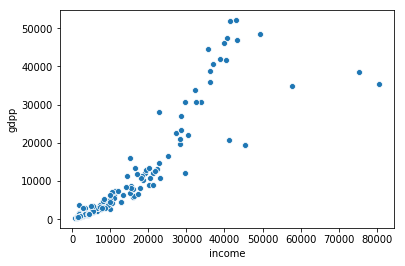

In [45]:
#K-means has done a satisfactory job here. Let's take a different approach and make the clusters only on the basis of these
sns.scatterplot(x='income',y='gdpp',data=data6)

**From the clusters it is observed that cluster 2 and 4 have pretty low values of the 4 indicators that we chose. Hence these are the countries that we need to focus.**

### Hierarchical Clustering

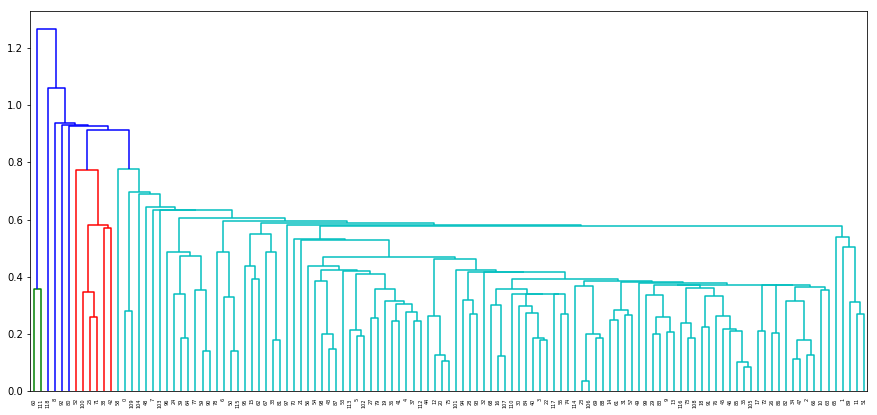

In [46]:
#Let's try hierarchical clustering to see if it works well
#First we'll try the single linkage procedure.
plt.figure(figsize = (15,7))
mergings = linkage(data3_1, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

In [47]:
#We don't get good results here.
#Let's try complete linkage method
plt.figure(figsize = (15,7))
mergings = linkage(data3_1, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [48]:
#Okay now we are seeing some good clusters here. Let's see if they make sense if we eliminate the barriers
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 5).reshape(-1,))
data3_hc = pd.concat([data3, clusterCut], axis=1)
data3_hc.columns = ['country', 'PC1', 'PC2','PC3','ClusterID']

In [49]:
data3_hc.head()

country       PC1       PC2       PC3  ClusterID
0          Afghanistan -2.637442  1.469038 -0.541359        0.0
1              Algeria -0.457626 -0.673301  0.961867        1.0
2  Antigua and Barbuda  0.649849 -1.024374 -0.250103        2.0
3            Argentina  0.037197 -0.680889  1.466963        2.0
4              Armenia -0.332692 -1.274517  0.176636        3.0

In [50]:
data7=pd.merge(data,data3_hc,on='country')
data8=data7[['country','child_mort','exports','imports','health','income','inflation','life_expec','total_fer','gdpp','ClusterID']]
data8.head()

country  child_mort  exports   imports    health  income  \
0          Afghanistan        90.2    55.30   248.297   41.9174    1610   
1              Algeria        27.3  1712.64  1400.440  185.9820   12900   
2  Antigua and Barbuda        10.3  5551.00  7185.800  735.6600   19100   
3            Argentina        14.5  1946.70  1648.000  834.3000   18700   
4              Armenia        18.1   669.76  1458.660  141.6800    6700   

   inflation  life_expec  total_fer   gdpp  ClusterID  
0       9.44        56.2       5.82    553        0.0  
1      16.10        76.5       2.89   4460        1.0  
2       1.44        76.8       2.13  12200        2.0  
3      20.90        75.8       2.37  10300        2.0  
4       7.77        73.3       1.69   3220        3.0

In [51]:
data8['ClusterID'].value_counts()

2.0    63
1.0    18
0.0    16
4.0    11
3.0    11
Name: ClusterID, dtype: int64

In [52]:
#Cluster 4 doesn't have enough amount of clusters. Let's see if other clusters are good or not.
data8[data8['ClusterID']==2]

country  child_mort      exports       imports     health  \
2    Antigua and Barbuda        10.3   5551.00000   7185.800000   735.6600   
3              Argentina        14.5   1946.70000   1648.000000   834.3000   
7             Azerbaijan        39.2   3171.12000   1208.880000   343.3920   
9                Bahrain         8.6  14386.50000  10536.300000  1028.7900   
10            Bangladesh        49.4    121.28000    165.244000    26.6816   
12               Belarus         5.5   3099.42000   3889.350000   338.2830   
13                Belize        18.8   2525.88000   2495.500000   225.6800   
14                 Benin       111.0    180.40400    281.976000    31.0780   
17              Botswana        52.5   2768.60000   3257.550000   527.0500   
18                Brazil        19.8   1198.40000   1321.600000  1009.1200   
20              Bulgaria        10.8   3433.68000   3625.200000   469.9080   
22              Cameroon       108.0    290.82000    353.700000    67.2030   
23                Canada         5.6  13793.40000  14694.000000  5356.2000   
26                 China        15.7   1199.28000   1030.560000   231.1920   
27              Colombia        18.6    993.75000   1112.500000   474.3750   
28               Comoros        88.2    126.88500    397.573000    34.6819   
29           Congo, Rep.        63.9   2331.74000   1498.780000    67.4040   
30               Croatia         5.5   5076.00000   5143.500000  1047.6000   
31                Cyprus         3.6  15461.60000  17710.000000  1838.7600   
32        Czech Republic         3.4  13068.00000  12454.200000  1560.2400   
34               Ecuador        25.1   1300.14000   1509.840000   375.5960   
35                 Egypt        29.1    553.80000    691.600000   121.1600   
40               Finland         3.0  17879.40000  17278.800000  4134.9000   
43                Gambia        80.3    133.75600    239.974000    31.9778   
44               Georgia        16.5   1036.00000   1562.880000   298.9600   
45               Germany         4.2  17681.40000  15507.800000  4848.8000   
46                 Ghana        74.7    386.45000    601.290000    68.3820   
47                Greece         3.9   5944.90000   8258.300000  2770.7000   
49             Guatemala        35.4    730.14000   1027.290000   193.8550   
53               Iceland         2.6  22374.60000  18142.700000  3938.6000   
..                   ...         ...          ...           ...        ...   
61                 Japan         3.2   6675.00000   6052.000000  4223.0500   
63            Kazakhstan        21.5   4008.94000   2711.930000   389.1030   
66                Kuwait        10.8  25679.50000  11704.000000  1012.5500   
69                Latvia         7.8   6068.10000   6226.300000   754.8400   
72                 Libya        16.6   7937.60000   5094.100000   469.4800   
73             Lithuania         6.1   7836.00000   8064.000000   844.8000   
75              Malaysia         7.9   7881.83000   6439.700000   398.1730   
76              Maldives        13.2   5509.60000   4643.400000   449.4300   
79             Mauritius        15.0   4096.00000   4976.000000   480.0000   
82              Mongolia        26.1   1237.55000   1502.550000   144.1600   
83               Morocco        33.5    911.26000   1216.900000   147.1600   
84               Myanmar        64.4      1.07692      0.651092    19.4636   
85               Namibia        56.0   2480.82000   3150.330000   351.8820   
86                 Nepal        47.0     56.71360    215.488000    31.0800   
87           New Zealand         6.2  10211.10000   9436.000000  3403.7000   
88                  Oman        11.7  12680.10000   7951.600000   534.6100   
91              Paraguay        24.1   1779.73000   1663.450000   189.6010   
92                  Peru        20.3   1395.56000   1194.760000   255.0160   
93           Philippines        31.9    741.24000    779.580000    76.8930   
94                Poland         6.0   

In [54]:
data8[data8['ClusterID']==3]
#this would be the cluster that we need to focus on

country  child_mort     exports    imports     health  income  \
4        Armenia        18.1    669.7600   1458.660   141.6800    6700   
5      Australia         4.8  10276.2000  10847.100  4530.8700   41400   
19        Brunei        10.5  23792.2000   9884.000  1002.5200   80600   
36   El Salvador        19.2    804.3100   1393.340   206.6090    7300   
37       Eritrea        55.2     23.0878    112.306    12.8212    1420   
41        France         4.2  10880.8000  11408.600  4831.4000   36900   
48       Grenada        14.6   1754.0600   3626.040   431.8820   11200   
70       Lesotho        99.7    460.9800   1181.700   129.8700    2380   
102   Seychelles        14.4  10130.4000  11664.000   367.2000   20400   
112     Suriname        24.1   4357.5000   3187.200   581.8300   14200   
113       Sweden         3.0  24070.2000  21204.700  5017.2300   42900   

     inflation  life_expec  total_fer   gdpp  ClusterID  
4        7.770        73.3       1.69   3220        3.0  
5        1.160        82.0       1.93  51900        3.0  
19      16.700        77.1       1.84  35300        3.0  
36       2.650        74.1       2.27   2990        3.0  
37      11.600        61.7       4.61    482        3.0  
41       1.050        81.4       2.03  40600        3.0  
48       0.480        71.3       2.24   7370        3.0  
70       4.150        46.5       3.30   1170        3.0  
102     -4.210        73.4       2.17  10800        3.0  
112      7.200        70.3       2.52   8300        3.0  
113      0.991        81.5       1.98  52100        3.0

In [55]:
#some countries haven't been properly clustered here.
data8[data8['ClusterID']==0]

country  child_mort    exports    imports     health  income  \
0           Afghanistan        90.2     55.300    248.297    41.9174    1610   
15               Bhutan        42.7    926.500   1541.260   113.3600    6420   
24           Cape Verde        26.5   1082.370   2045.580   135.3790    5830   
33   Dominican Republic        34.4   1237.150   1814.850   338.9900   11100   
39                 Fiji        24.1   2109.700   2332.350   177.3900    7350   
59                Italy         4.0   9021.600   9737.600  3411.7400   36200   
62               Jordan        21.1   1777.440   2539.200   295.8720    9470   
64                Kenya        62.2    200.169    324.912    45.9325    2480   
67      Kyrgyz Republic        29.6    454.080    718.960    54.3840    2790   
77                Malta         6.8  32283.000  32494.000  1825.1500   28300   
81              Moldova        17.2    638.960   1279.550   190.7100    3910   
90               Panama        19.7   5656.000   6318.560   654.4800   15400   
95             Portugal         3.9   6727.500   8415.000  2475.0000   27200   
96              Romania        11.5   2682.980   3193.240   459.2340   17800   
104            Slovenia         3.2  15046.200  14718.600  2201.9400   28700   
109           Sri Lanka        11.2    550.760    753.080    82.6140    8560   

     inflation  life_expec  total_fer   gdpp  ClusterID  
0        9.440        56.2       5.82    553        0.0  
15       5.990        72.1       2.38   2180        0.0  
24       0.505        72.5       2.67   3310        0.0  
33       5.440        74.6       2.60   5450        0.0  
39       4.230        65.3       2.67   3650        0.0  
59       0.319        81.7       1.46  35800        0.0  
62       8.430        75.8       3.66   3680        0.0  
64       2.090        62.8       4.37    967        0.0  
67      10.000        68.5       3.10    880        0.0  
77       3.830        80.3       1.36  21100        0.0  
81      11.100        69.7       1.27   1630        0.0  
90       2.590        77.8       2.62   8080        0.0  
95       0.643        79.8       1.39  22500        0.0  
96       3.530        73.7       1.59   8230        0.0  
104     -0.987        79.5       1.57  23400        0.0  
109     22.800        74.4       2.20   2810        0.0

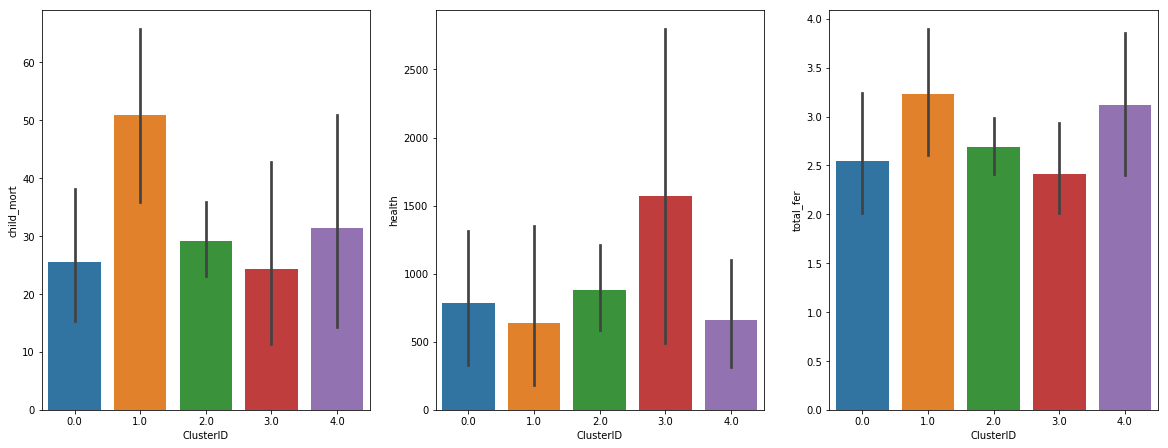

In [56]:
# Checking for cluster values of child_mort, health, total_fer
plt.figure(figsize=(20, 25))

#plotting the clusters values for child_mort
plt.subplot(3,3,1)
sns.barplot(x=data8.ClusterID,y=data8.child_mort)

#plotting the clusters values for health
plt.subplot(3,3,2)
sns.barplot(x=data8.ClusterID,y=data8.health)

#plotting the clusters values for total_fer
plt.subplot(3,3,3)
sns.barplot(x=data8.ClusterID,y=data8.total_fer)

In [57]:
#Let's visualise the clusters here. We don't see the countries properly clustered here. Hence we don't create cluster means
#as that would give a skewed result
datap=data8[data8['ClusterID']==0]
sns.scatterplot(x='income',y='child_mort',data=datap)

In [58]:
#Bucketting the variables as per cluster values for Hierarchical Clustering
List_Of_Countries_HC=data[data['child_mort']>68.478261]
List_Of_Countries_HC=List_Of_Countries_HC[List_Of_Countries_HC['health']<= 135.873852]

In [59]:
List_Of_Countries_HC.sort_values(['child_mort', 'health'], ascending=[0, 0]).head(10)

country  child_mort   exports    health   imports  \
66                      Haiti       208.0   101.286   45.7442   428.314   
132              Sierra Leone       160.0    67.032   52.2690   137.655   
32                       Chad       150.0   330.096   40.6341   390.195   
31   Central African Republic       149.0    52.628   17.7508   118.190   
97                       Mali       137.0   161.424   35.2584   248.508   
113                   Nigeria       130.0   589.490  118.1310   405.420   
112                     Niger       123.0    77.256   17.9568   170.868   
3                      Angola       119.0  2199.190  100.6050  1514.370   
25               Burkina Faso       116.0   110.400   38.7550   170.200   
37           Congo, Dem. Rep.       116.0   137.274   26.4194   165.664   

     income  inflation  life_expec  total_fer  gdpp  
66     1500       5.45        32.1       3.33   662  
132    1220      17.20        55.0       5.20   399  
32     1930       6.39        56.5       6.59   897  
31      888       2.01        47.5       5.21   446  
97     1870       4.37        59.5       6.55   708  
113    5150     104.00        60.5       5.84  2330  
112     814       2.55        58.8       7.49   348  
3      5900      22.40        60.1       6.16  3530  
25     1430       6.81        57.9       5.87   575  
37      609      20.80        57.5       6.54   334

**Result : We use the clusters formed during K-means clustering to find the countries that we require since Hierarchical clustering is not showing proper clusters here. For K-means part, we got Cluster 2 and 4 might be the ones which has a proper need of aid.**


- In this assignment K-means and Hierarchical don't produce identical insights.This would depend on the way the principal components and the final number of clusters are chosen..

- For outliers that removed before clustering took place, we can take any approach to include them in the final list of countries that you'd focus on. Either reassign them to the clusters that were formed and see if Cluster 2 and Cluster 4 have any more countries. Or use one variable from some of the main indicators to bin the entire 167 countries. Like if you take GDPP, keep the bin limits as 0-1700, 1700-3200,3200-6000,6000-13000 and >13000. The bin limits are decided on the basis of the approximate gdpp means that we got for the 5 clusters. Categorise all the countries from the original dataset within these limits and then take all the countries less than 1700 as the cutoff.Similarly, proceed for the 2nd variable.